In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b30279fbcdda445ca9f2191be35c0d28 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-9Z6G6Y-gX6-TeLm-gaknG2fXd7Eoos8s1HiwC5UI5F9',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b30279fbcdda445ca9f2191be35c0d28.get_object(Bucket='mnist-donotdelete-pr-j2cwa8tyyrpajq',Key='mnist_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

MNIST_Data = pd.read_csv(body)
MNIST_Data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
body = client_b30279fbcdda445ca9f2191be35c0d28.get_object(Bucket='mnist-donotdelete-pr-j2cwa8tyyrpajq',Key='mnist_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

MNIST_Test = pd.read_csv(body)
MNIST_Test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#MNIST_Data = pd.read_csv("mnist-in-csv/mnist_train.csv")
#MNIST_Data.head()

In [4]:
MNIST_Data['label'] = MNIST_Data['label'].astype('category')

In [5]:
from keras.utils import np_utils
x = MNIST_Data.drop('label', axis=1)
y = MNIST_Data['label']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.30)
x_train = x_train / 255
x_valid = x_valid / 255

y_train = np_utils.to_categorical(y_train)
y_valid = np_utils.to_categorical(y_valid)

print("Training data shape::")
print(x_train.shape[0], x_train.shape[1])
print(y_train.shape[0])

print("validation data shape::")
print(x_valid.shape[0], x_valid.shape[1])
print(y_valid.shape[0])
num_classes = 10

Using TensorFlow backend.


Training data shape::
42000 784
42000
validation data shape::
18000 784
18000


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers, losses

seq_model = Sequential()
seq_model.add(Dense(28*28,  activation = 'relu', input_shape=(28*28, ), name= "Fist_Dense"))
seq_model.add(Dense(64, activation = 'relu', name= "Second_Dense"))
seq_model.add(Dense(32, activation = 'relu', name= "Third_Dense"))
seq_model.add(Dense(10,  activation = 'softmax', name= "OutputLayer"))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
seq_model.compile(loss=losses.categorical_crossentropy, optimizer=sgd, metrics=['accuracy'])

fir_params = seq_model.fit(x_train, y_train, 
              validation_data=(x_valid, y_valid), 
              epochs=10, batch_size=100, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 147s 4ms/step - loss: 0.4771 - acc: 0.8594 - val_loss: 0.2227 - val_acc: 0.9375
Epoch 2/10
42000/42000 [==============================] - 152s 4ms/step - loss: 0.1707 - acc: 0.9501 - val_loss: 0.1665 - val_acc: 0.9508
Epoch 3/10
42000/42000 [==============================] - 147s 4ms/step - loss: 0.1181 - acc: 0.9651 - val_loss: 0.1255 - val_acc: 0.9648
Epoch 4/10
42000/42000 [==============================] - 145s 3ms/step - loss: 0.0844 - acc: 0.9751 - val_loss: 0.1082 - val_acc: 0.9688
Epoch 5/10
42000/42000 [==============================] - 152s 4ms/step - loss: 0.0638 - acc: 0.9811 - val_loss: 0.1039 - val_acc: 0.9694
Epoch 6/10
42000/42000 [==============================] - 146s 3ms/step - loss: 0.0484 - acc: 0.9857 - val_loss: 0.0988 - val_acc: 0.9726
Epoch 7/10
42000/42000 [==============================] - 153s 4ms/step - loss: 0.0376 - acc: 0.9894 - val_loss: 0.0970 - 

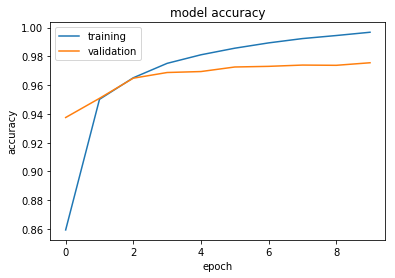

In [14]:
# Final evaluation of the model
import matplotlib.pyplot as plt
%matplotlib inline
loss, acc = seq_model.evaluate(x_valid, y_valid, verbose=0)

plt.plot(fir_params.history['acc'])
plt.plot(fir_params.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()



In [21]:
print('validation loss:', np.round(loss, 3))
print('validation accuracy:', np.round(acc, 3))

validation loss: 0.094
validation accuracy: 0.976


In [8]:
seq_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Fist_Dense (Dense)           (None, 784)               615440    
_________________________________________________________________
Second_Dense (Dense)         (None, 64)                50240     
_________________________________________________________________
Third_Dense (Dense)          (None, 32)                2080      
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                330       
Total params: 668,090
Trainable params: 668,090
Non-trainable params: 0
_________________________________________________________________
